<h1 align="center">Scientific Programming in Python</h1>
<h2 align="center">Topic 6: Python Profiling and Optimization  </h2> 


_Notebook created by Martín Villanueva - `martin.villanueva@usm.cl` - DI UTFSM - May 2017._

In [3]:
import numba
import numexpr as ne
import numpy as np
import matplotlib.pyplot as roberplot
import matplotlib.image as mpimg

%load_ext line_profiler
%load_ext memory_profiler

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def image_plot(img):
    roberplot.figure(figsize=(10,5))
    roberplot.imshow(img, cmap='gray')
    roberplot.axis('off')
    roberplot.show()
    
def histogram_plot(h):
    roberplot.figure(figsize=(5,10))
    roberplot.plot(range(len(h)), h)
    roberplot.xlim([-5,260])
    roberplot.ylim([0,200000])
    roberplot.xlabel('Feature index')
    roberplot.ylabel('Number of repetitions')
    roberplot.grid()
    roberplot.show()

## Local Binary Pattern Representation

Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number. 

Due to its discriminative power and computational simplicity, LBP texture operator has become a popular approach in various applications. 

Perhaps the most important property of the LBP operator in real-world applications is its robustness to monotonic gray-scale changes caused, for example, by illumination variations. Another important property is its computational simplicity, which makes it possible to analyze images in challenging real-time settings.

__Example of how LBP works:__
![image](data/lbp1.png)

__Type of features LBP compute:__
![image](data/lbp2.png)

Then, each pixel in the image is encoded as a 8-bit binary number (or its corresponding decimal representation) which represents a unique feature. With this representation we can make a histogram of the distribution of such features!

In [4]:
def lbp(region):
    """
    Region is a 3x3 ndarray
    """
    ret = (region > region[1,1]).astype(int)
    return (2**7)*ret[0,0] + (2**6)*ret[0,1] + (2**5)*ret[0,2] + (2**4)*ret[1,2] + (2**3)*ret[2,2] + \
           (2**2)*ret[2,1] + (2**1)*ret[2,0] + (2**0)*ret[1,0]


def lbp_representation(image):
    """
    Compute lbp representation of image
    """
    m,n = image.shape
    ret = np.empty((m-2,n-2))
    for i in range(1,m-1):
        for j in range(1,n-1):
            ret[i-1,j-1] = lbp(image[i-1:i+2, j-1:j+2])
    return ret


def lbp_histogram(image):
    """
    Compute lbp histogram representation of image
    """
    lbp_image = lbp_representation(image)
    m,n = lbp_image.shape
    hist = np.zeros(256)
    for i in range(m):
        for j in range(n):
            hist[lbp_image[i,j]] += 1
    return hist 

## Just an example of usage

In [5]:
img = mpimg.imread('data/doge.jpg')
img = rgb2gray(img)

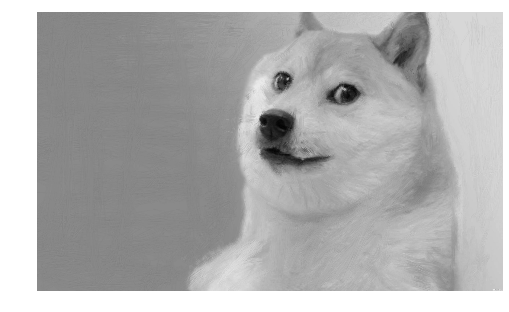

In [6]:
image_plot(img)

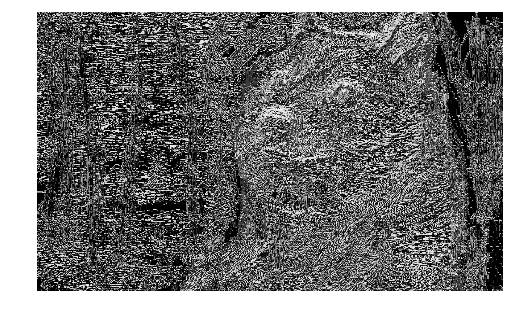

In [7]:
lbp_image = lbp_representation(img)
image_plot(lbp_image)

/Users/martin/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


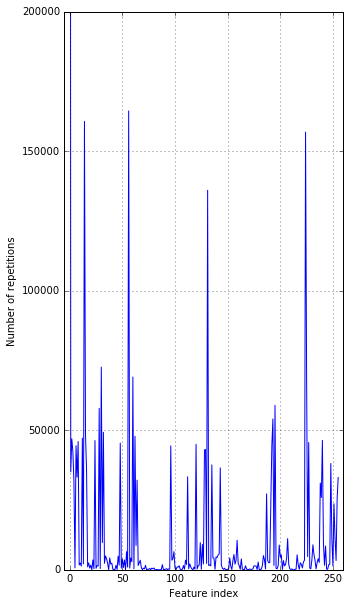

In [8]:
h = lbp_histogram(img)
histogram_plot(h)

## Problems
1. Profile the function `lbp_histogram()` with the profiling tools that you think are useful for this problem, and find the bottleneck(s).
2. Modify or implement new functions to fix such bottlenecks. You can use any of the tools learned so far (__NumPy, Numba, Cython, NumExpr, etc).__
3. Profile again (with your modifications) and verify that there exist improvements.